# Importing libraries we will be using 

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Defining the neural network function

In [2]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases randomly
        self.weights1 = np.random.randn(input_size, hidden_size)
        self.biases1 = np.zeros((1, hidden_size))
        self.weights2 = np.random.randn(hidden_size, output_size)
        self.biases2 = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward(self, x):
        # Forward propagation through the network
        hidden = self.sigmoid(np.dot(x, self.weights1) + self.biases1)
        output = self.sigmoid(np.dot(hidden, self.weights2) + self.biases2)
        return output

    def train(self, X_train, y_train, learning_rate, epochs, validation_data=None):
        # Train the network using backpropagation
        for epoch in range(epochs):
            loss = 0  # Initialize loss to 0 for each epoch

            for i in range(len(X_train)):
                x = X_train[i]
                y_true = y_train[i]
                y_pred = self.forward(x)

                # Calculate gradients using backpropagation
                error = y_true - y_pred
                delta2 = error * y_pred * (1 - y_pred)

                # Store the hidden layer output for backpropagation
                hidden = self.sigmoid(np.dot(x, self.weights1) + self.biases1)

                delta1 = np.dot(delta2, self.weights2.T) * hidden * (1 - hidden)

                # Reshape x to have 2D shape for the dot product
                x = x.reshape(1, -1)  # Reshape to (1, 30)

                # Update weights and biases
                self.weights2 += learning_rate * np.dot(hidden.T, delta2)
                self.biases2 += learning_rate * delta2
                self.weights1 += learning_rate * np.dot(x.T, delta1)
                self.biases1 += learning_rate * delta1

                # Calculate loss for each training example
                loss += error**2  # Assuming mean squared error loss

            # Calculate average loss over the epoch
            loss /= len(X_train)

            if validation_data is not None:
                # Calculate validation loss and accuracy (implement these)
                val_loss = 0
                val_accuracy = 0
                prev_val_loss = val_loss

                print("Epoch:", epoch, "Training Loss:", loss, "Validation Loss:", val_loss, "Validation Accuracy:", val_accuracy)

                # Implement early stopping if desired
                if early_stopping and val_loss > prev_val_loss:
                    print("Early stopping triggered!")
                    break

    def predict(self, X_test):
        # Make predictions on test data
        predictions = np.round(self.forward(X_test))
        return predictions

# Load the dataset


In [3]:
# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Preprocess the data

In [4]:
# Preprocess the data
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)
# Scale all datasets
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)  # Scale the validation set
X_test = scaler.transform(X_test)

# Define the hyperparameters

In [5]:
# Define hyperparameters (adjust as needed)
input_size = X_train.shape[1]
hidden_size = 20  # Experiment with different sizes
output_size = 1
learning_rate = 0.01  # Try smaller learning rates
epochs = 300  # Train for more epochs
early_stopping = True  # Implement early stopping

# Create and train the neural network

In [6]:
# Create the neural network with dropout
nn = NeuralNetwork(input_size, hidden_size, output_size)

# Train the network with validation
nn.train(X_train, y_train, learning_rate, epochs, validation_data=(X_val, y_val))

Epoch: 0 Training Loss: [[0.33893085]] Validation Loss: 0 Validation Accuracy: 0
Epoch: 1 Training Loss: [[0.18563925]] Validation Loss: 0 Validation Accuracy: 0
Epoch: 2 Training Loss: [[0.13226641]] Validation Loss: 0 Validation Accuracy: 0
Epoch: 3 Training Loss: [[0.10734432]] Validation Loss: 0 Validation Accuracy: 0
Epoch: 4 Training Loss: [[0.09175923]] Validation Loss: 0 Validation Accuracy: 0
Epoch: 5 Training Loss: [[0.08073277]] Validation Loss: 0 Validation Accuracy: 0
Epoch: 6 Training Loss: [[0.07248944]] Validation Loss: 0 Validation Accuracy: 0
Epoch: 7 Training Loss: [[0.06614388]] Validation Loss: 0 Validation Accuracy: 0
Epoch: 8 Training Loss: [[0.06114827]] Validation Loss: 0 Validation Accuracy: 0
Epoch: 9 Training Loss: [[0.05713857]] Validation Loss: 0 Validation Accuracy: 0
Epoch: 10 Training Loss: [[0.05386619]] Validation Loss: 0 Validation Accuracy: 0
Epoch: 11 Training Loss: [[0.05115575]] Validation Loss: 0 Validation Accuracy: 0
Epoch: 12 Training Loss: [

# Evaluate the performance

In [7]:
# Evaluate performance and visualize results
predictions = nn.predict(X_test)
accuracy = np.mean(predictions == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.5526315789473685


# Visualize confusion matrix

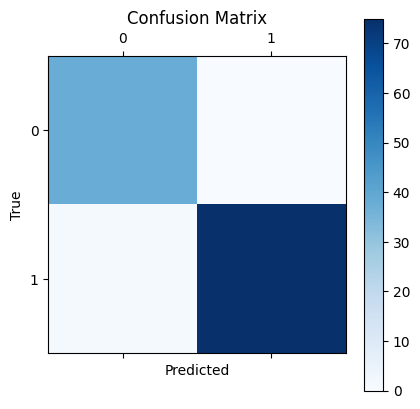

In [8]:
# Visualize confusion matrix
cm = confusion_matrix(y_test, predictions)
plt.matshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()